The goal of this exercise is to manipulate a data distribution and to get familiar with the law of large numbers in an informal way.

1) Propose a 2-dimensional random variable Z = (X, Y), with X and Y being two real, discrete or continuous random variables. These two variables muse represent meaningful quantities of your choice, and they must have units. Compute the expected value of Z, that must be finite.

2) Sample a number n (of your choice) of points form the law of Z and plot them in a 2 dimensional figure.

3) For increasing values n, compute the empirical average of the first n samples and verify that it converges to the expected value, by plotting the euclidean distance between the empirical average and the excpected value as a function of n.

Remarks :
- Please pay attention to the fact that the expected value and the empirical average are different objects.
- Note that both the empirical average and the expected value are vectors with 2 entries, as our variable is 2 dimensional.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

mu_X, sigma_X = 10, 2   # meters
mu_Y, sigma_Y = 5, 1    # meters

expected_value = np.array([mu_X, mu_Y])

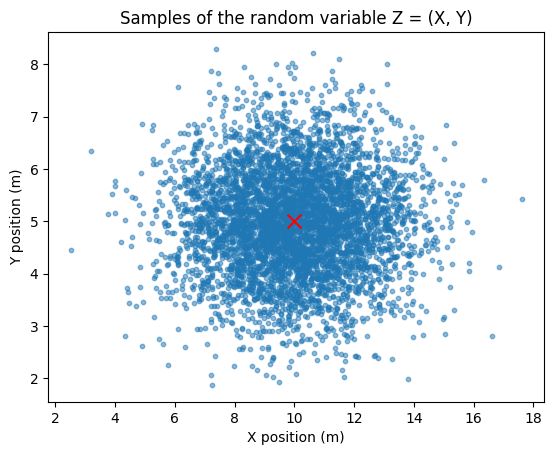

In [2]:
n = 5000

X_samples = np.random.normal(mu_X, sigma_X, n)
Y_samples = np.random.normal(mu_Y, sigma_Y, n)

Z_samples = np.column_stack((X_samples, Y_samples))

plt.figure()
plt.scatter(Z_samples[:, 0], Z_samples[:, 1], s=10, alpha=0.5)
plt.scatter(*expected_value, color="red", marker="x", s=100)
plt.xlabel("X position (m)")
plt.ylabel("Y position (m)")
plt.title("Samples of the random variable Z = (X, Y)")
plt.show()

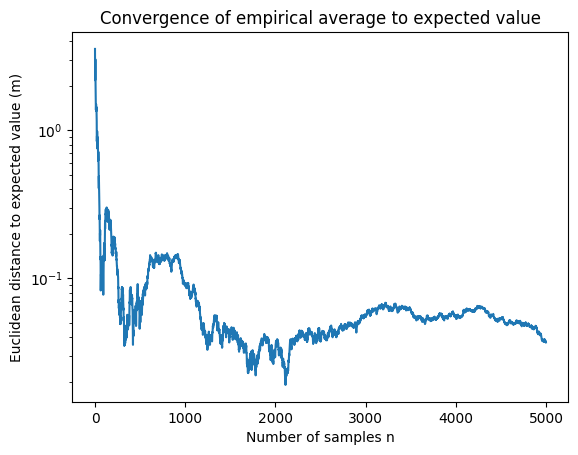

In [3]:
empirical_means = np.cumsum(Z_samples, axis=0) / np.arange(1, n + 1).reshape(-1, 1)

distances = np.linalg.norm(empirical_means - expected_value, axis=1)

plt.figure()
plt.plot(distances)
plt.xlabel("Number of samples n")
plt.ylabel("Euclidean distance to expected value (m)")
plt.title("Convergence of empirical average to expected value")
plt.yscale("log")
plt.show()

# 📘 Interpretation — Law of Large Numbers in 2D

## Definition of the Random Variable

We consider a two-dimensional random variable  
\( Z = (X, Y) \), where:

- \( X \) represents a horizontal position measured in meters.
- \( Y \) represents a vertical position measured in meters.

Both variables follow normal distributions and are independent. The expected value  
\( \mathbb{E}[Z] = (10, 5) \) corresponds to the mean position of the object in space.

---

## Sampling and Visualization

A finite number of samples from the distribution of \( Z \) forms a cloud of points in the plane.  
The expected value is shown as a single point, which does not belong to the dataset but represents the theoretical average over infinitely many samples.

This highlights the difference between:
- the **distribution of samples**
- the **expected value**, which is a property of the distribution itself

---

## Empirical Average vs Expected Value

The empirical average \( \bar{Z}_n \) is computed from the first \( n \) observed samples and is itself a random quantity.

As \( n \) increases:
- the empirical average stabilizes
- its distance to the expected value decreases

This behavior illustrates the **Law of Large Numbers**, which states that the empirical average converges to the expected value as the number of samples grows.

---

## Convergence Analysis

The Euclidean distance between the empirical average and the expected value decreases as \( n \) increases.  
Using a logarithmic scale makes the convergence clearer and shows that fluctuations become smaller with more observations.

---

## Conclusion

Although both the expected value and the empirical average are vectors in \( \mathbb{R}^2 \), they are fundamentally different objects:

- The expected value is deterministic and theoretical.
- The empirical average is random and depends on the sampled data.

This experiment provides an intuitive, geometric illustration of the Law of Large Numbers in a multivariate setting.
